# 1. Consider the dataset
#Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#loading the dataset

df = pd.read_csv('adult.csv') 

In [3]:
#reading first 5 rows of the dataset
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#reading first 5 rows of the dataset
df.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# 2. Formulate a hypothesis

In [6]:
#H0: There is no association between the two categorical variables (gender and income).

#Gender does not impact an individual's income. Income level cannot determine if an indidvidual is male or female.

#H1: There is an association between the two variables(gender and income.


#Since, we are having 2 categorical variables we will be using Chi-square test of independence to test our hypothesis.


# 3. Analyze your Dataset

In [7]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df.describe() #preliminary EDA

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.info()  #preliminary EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


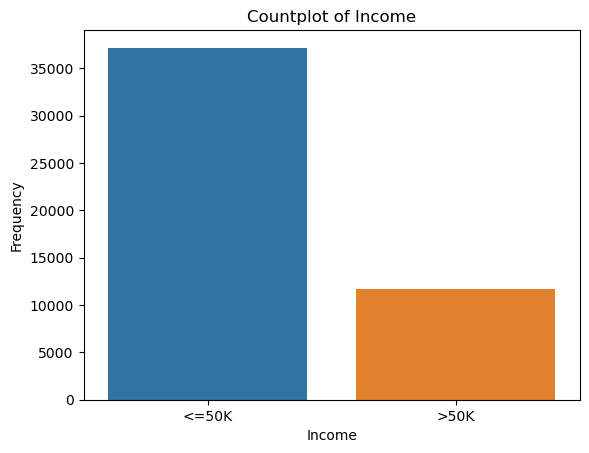

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


# Plot a categorical column and its frequency using a countplot#shows imbalanced dataset.w
sns.countplot(x='income', data=df)
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Countplot of Income')
plt.show()

In [11]:
n_less_than_or_equal_to_50k = df[df['income'] == '<=50K'].shape[0]
n_greater_than_50k = df[df['income'] == '>50K'].shape[0]

In [12]:
a= n_greater_than_50k/n_less_than_or_equal_to_50k 
a

0.3145471672722379

In [13]:
#Ratio of classes: The ratio of the number of samples in the minority class to the majority class 
#can also indicate whether the dataset is imbalanced.

#A ratio less than 1:10 is often considered imbalanced.
#Here, we can see the ratio of minority to majority class is 0.314. 
#So, by common practice we can conclude the data to be not imbalanced. 
#And we can safely go ahead with out model building.

In [14]:
num_duplicates = df.duplicated().sum()  #checking for duplicate values
print("Number of duplicate rows: ", num_duplicates) #why are we getting duplicates? 
#Based on the nature of dataset it is a population data 
#so we believe it is okay to have individuals with the same attributes across the dataset.

Number of duplicate rows:  52


<AxesSubplot:xlabel='age'>

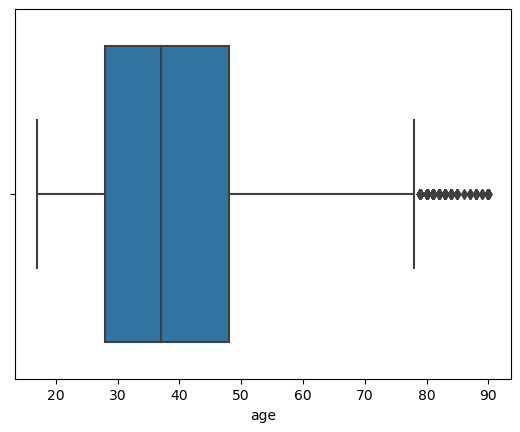

In [15]:
import seaborn as sns

# Plot box plots for each column
sns.boxplot(x=df.age, data=df)


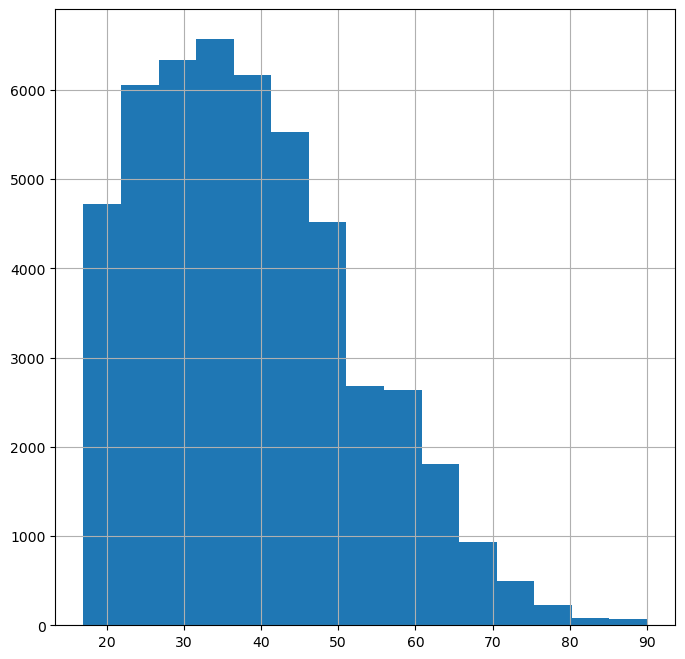

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [16]:
df['age'].hist(figsize=(8,8), bins = 15)
plt.show()
df['age'].describe()

#majority of people are 30 - 40 years of age

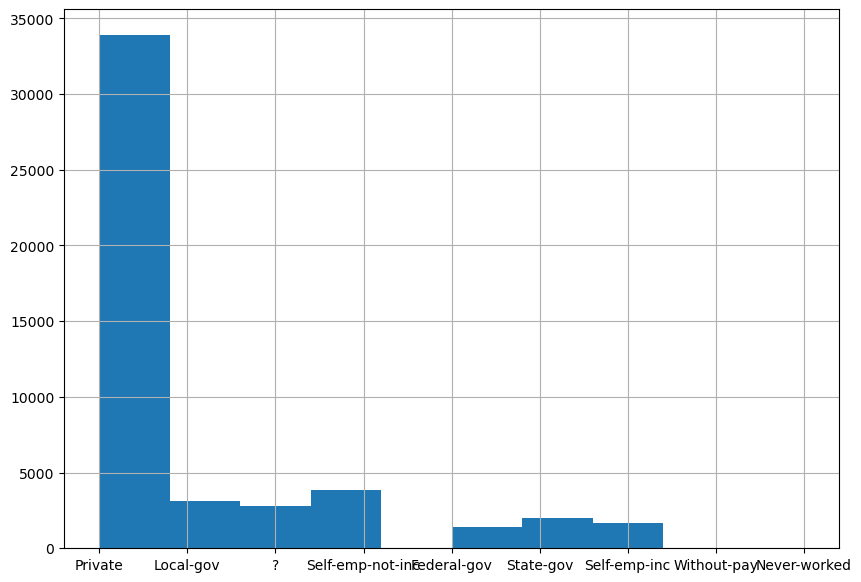

In [17]:
df['workclass'].hist(figsize=(10,7))
plt.show()

#majority of adults are working in the private sector
#we detect the presence of ? which should be removed from our analysis.

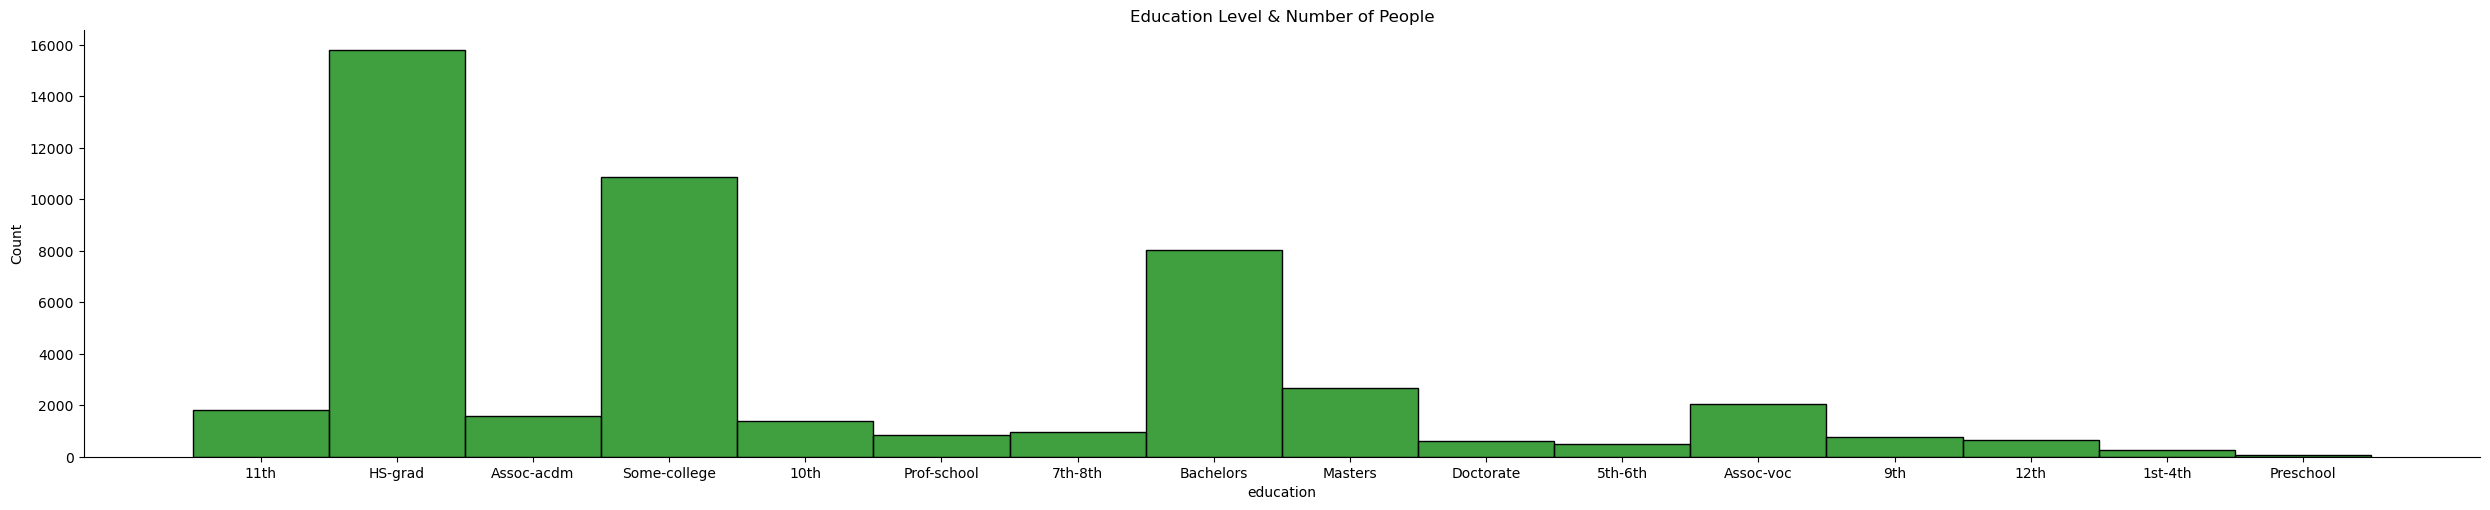

In [18]:
sns.displot(color = 'green', x=df['education'], aspect=5)
plt.title('Education Level & Number of People')
plt.show()

#most of the adults have high school graduation degree as their highest educational qualification

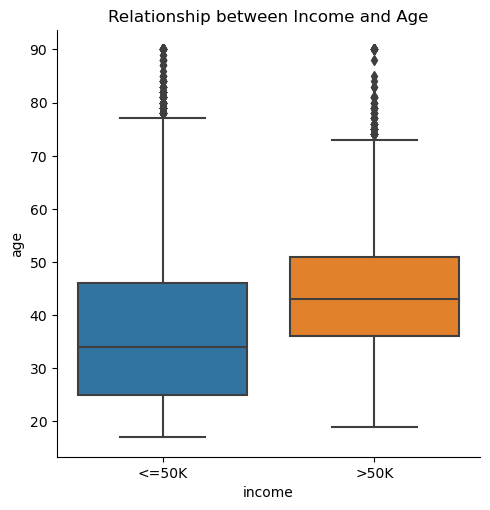

In [19]:
#Finding Relationship between Income and Age#categorical and numerical variable plot

sns.catplot(data=df,x='income', y='age', kind= 'box', aspect=1)
plt.title('Relationship between Income and Age')
plt.show()

#majority of people having income less than equal to 50k are in the age group 25-45
#majority of people having income greater than 50k are in the age group 35-50

<AxesSubplot:>

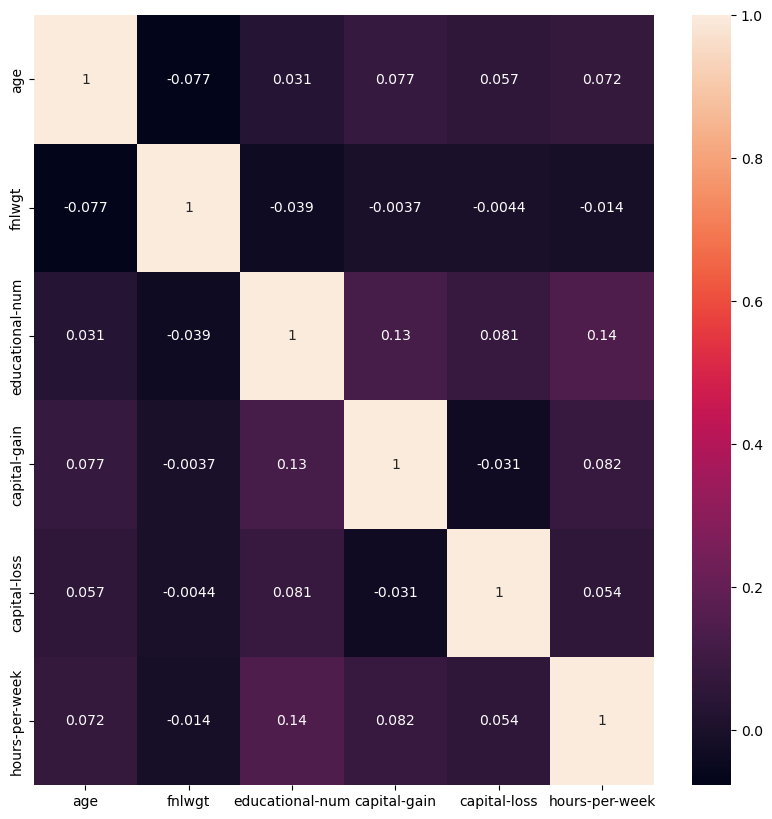

In [20]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True)

#there is no strong correlation between the numerical features within the dataset. 
#SO, the numerical features are seemingly independent.
#Naive Bayes assumes that the features are independent,
#so it would be a good classifier to apply to this dataset using this particular nature observed in the numerical variables.

In [21]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


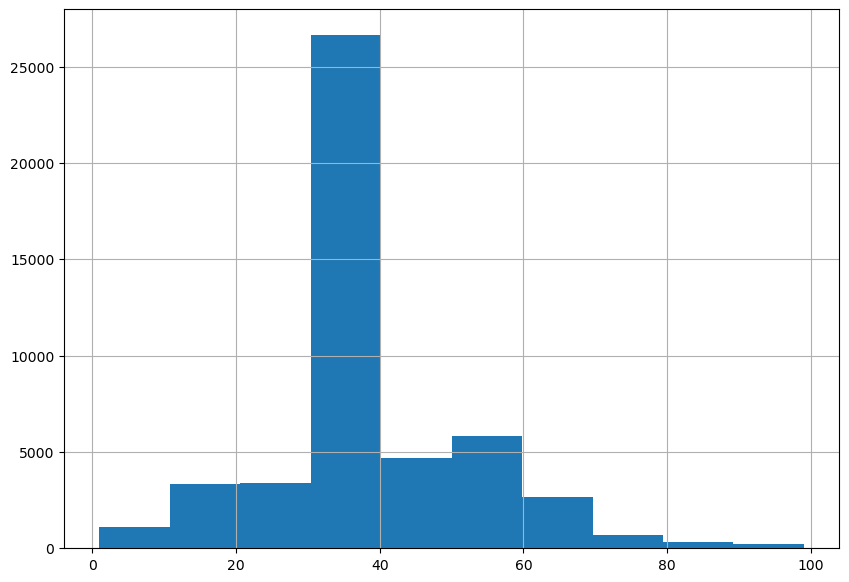

In [22]:
df['hours-per-week'].hist(figsize=(10,7))
plt.show()

#most of the individuals have working hours per week between 30-40


# 4. Pre-process your data

In [23]:
columns_to_drop = ['education', 'fnlwgt'] #Included in part 10, ways to imporve accuracy of the model.

In [24]:
df=df.drop(columns_to_drop,axis=1)  #Included in part 10, ways to imporve accuracy of the model.

In [25]:
df.isnull().sum() #no missing or null values

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [26]:
df.replace('?', np.nan, inplace=True) 
#we noticed through preliminary look that there were some rows that had "?".
#to clean the dataset we removed those rows as shown below

In [27]:
df.dropna(inplace=True) #Drop rows with missing values:

In [28]:
#Convert categorical variables to numerical using one-hot encoding: 
#The reason for using one-hot encoding is explained in the word filein the question '5. Will you need to Vectorize?''
df = pd.get_dummies(df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'],drop_first=True)


In [29]:
# Convert income column to 0 and 1
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [30]:
df.head()
#just have a look after conversion


,age,educational-num,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,0,0,50,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,0,0,40,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,7688,0,40,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,6,0,0,30,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


# 7. Perform your Train and Test Split

In [31]:
X = df.drop('income', axis=1)
y = df['income']
#Split the data into features and target variable:


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Split the data into training and testing sets:

# Scale the numeric features using StandardScaler:

In [33]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))


# 6. Use Naive Bayes model

In [34]:
# Import libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [35]:
# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# 8. Test your hypothesis

# Second method

In [ ]:

from scipy.stats import chi2_contingency

# Load the data from the adult.csv file
data = pd.read_csv('adult.csv')

# Create a contingency table of gender and income
contingency_table = pd.crosstab(data['gender'], data['income'])

# Perform the chi-square test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Compare p-value with significance level (e.g., 0.05) to determine statistical significance
if p_val < 0.05:
    print(" ")
    print("Based on our hypothesis test conducted we can reject the null hypothesis.")
    print("Thus, we can state there is sufficient evidence to conclude there is a significant association or dependence between the two categorical variables gender and income.")
else:
    print("There is not enough evidence to reject the null hypothesis.")


# 9. Now use your test data to compute the accuracy of the model

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Evaluate the model - training accuracy
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

# 10. Can it be improved? Explain how

# 1.Changing the train test split ratio

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
#Split the data into training and testing sets:

In [ ]:
# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

In [ ]:
# Evaluate the model - testing accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
# Evaluate the model - training accuracy
y_pred = model.predict(X_train)
accuracy = accuracy_score(y_train, y_pred)
print("Accuracy:", accuracy)

In [ ]:
 0.8203127468014532-0.8193410481314956 #Difference between training and testing accuracy with 70-30 split

In [ ]:
0.819609143931227-0.8180210060807076 #Difference between training and testing accuracy with 80-20 split

# 2. Apply k-fold Cross Validation 

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold, cross_val_score



In [ ]:
# Create a Naive Bayes classifier object
nb_classifier = GaussianNB()

# Use the KFold function from scikit-learn to split the dataset into k folds
k = 5
kf = KFold(n_splits=k)

# Use the cross_val_score function from scikit-learn to perform k-fold cross-validation on the Naive Bayes classifier
scores = cross_val_score(nb_classifier, X, y, cv=kf)

# Print the mean and standard deviation of the cross-validation scores
print("Cross-validation scores:", scores)
print("Mean score:", scores.mean())
print("Standard deviation:", scores.std())

# 3. Change in perspective. Looking at performance measure beyond accuracy.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))